# Load necessary libararies

In [3]:
import os 
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout

We have two folders in out fruits360 dataset, so we'll iterate through each of the folders and append the data in our respective lists

In [ ]:
arr1 = []
arr2 = []
DATADIR1 = 'fruits-360/Training/'
CATEGORIES = ["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi","Lemon","Mango","Orange"]
img_size = 100

#For training set ---
for category in CATEGORIES:
    path = os.path.join(DATADIR1, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):
        if(image.endswith('jpg')):
            img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (img_size,img_size))
            arr1.append([img_array,class_num])

In [2]:
#For test set ---
DATADIR2 = 'fruits-360/Test/'

for category in CATEGORIES:
    path = os.path.join(DATADIR2, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):
        if(image.endswith('jpg')):
            img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (img_size,img_size))
            arr2.append([img_array,class_num])
            
print(len(arr1))
print(len(arr2))

NameError: name 'CATEGORIES' is not defined

For training set ,save both the features and labels in one list

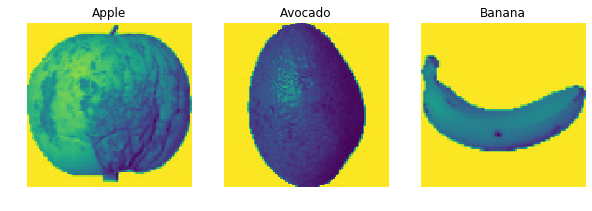

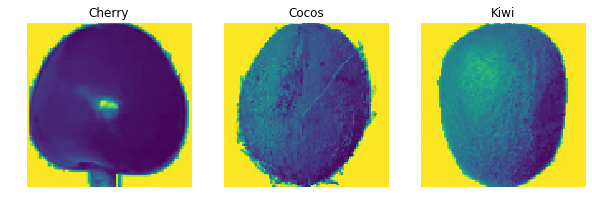

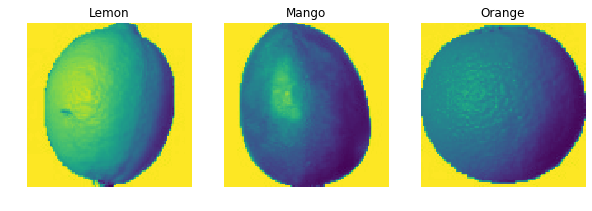

In [4]:
fruits_to_train = []
for features,label in arr1:
    fruits_to_train.append(features)

pos = [[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruits = ["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a = 0
b = 1
c = 2
for i,j,k in pos:
    plt.subplots(figsize = (10,10))
    plt.subplot(1,3,1)
    plt.imshow(fruits_to_train[i])
    plt.title(fruits[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_to_train[j])
    plt.title(fruits[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_to_train[k])
    plt.title(fruits[c])
    plt.axis("off")
    #as 3 pictures are to be displayed at a time so we'll increment a, b and c by 3
    a+=3
    b+=3
    c+=3

It is quite necessary to shuffle the dataset before training for better accuracy otherwise our model will be like "All the fruits are Apples so first predict all as Apples then predict Avocado and bananas" like that. so we'll shuffle the data using python library 'random' that we imported above

# Splitting the dataset
we are already provided with separate training and test folders we can't use sklearn's train_test_split module here for now, so lets create our train and test lists

In [7]:
x_train = []
x_test =[]
y_train = []
y_test = []

#shuffle 
random.shuffle(arr1)
random.shuffle(arr2)

for features, label in arr1: #training data
    x_train.append(features)
    y_train.append(label)
x_train = np.array(x_train)
    
for features, label in arr2: #test data
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test)
        

In [8]:
#reshape and normalize
x_train=x_train.reshape(-1,img_size,img_size,1)
x_train=x_train/255
x_test=x_test.reshape(-1,img_size,img_size,1)
x_test=x_test/255
print(x_train.shape)
print(x_test.shape)

(4318, 100, 100, 1)
(1449, 100, 100, 1)


y is a categorical variable right! when you have multiple classes in a classification model it will not work well unless the classes are not distributed in a binary matrix.

In [6]:
y_train=to_categorical(y_train,num_classes=9)
y_test=to_categorical(y_test,num_classes=9)

NameError: name 'to_categorical' is not defined

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())